In [3]:
%load_ext autoreload

In [51]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%aimport plot_AUPRC
%aimport ADpred_LambertTFs_helper

import seaborn as sns

# 1. Merging PARROT erijman coords

In [14]:
erij_pred_output = pd.read_csv("../data/tf_30_AA_parrot_erij_pred.csv", index_col=0)
erij_pred_output["erij_pred"]= erij_pred_output["erij_pred"].str.replace("[", "")
erij_pred_output["erij_pred"]= erij_pred_output["erij_pred"].str.replace("]", "")
erij_pred_output["erij_pred"] = erij_pred_output["erij_pred"].str.split(r'\s+')
erij_pred_output["erij_pred"] = erij_pred_output["erij_pred"].apply(lambda x: float(x[1]))
erij_pred_output["uniprotID"] = erij_pred_output["GeneName"].str.split("|").str[1]
erij_pred_output.head()
# Best threshold:  0.1376

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,erij_pred,uniprotID
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVL,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,30,0,1,0,1,4,0,1,1,3,4,-5,0.027907,A0A087WUV0
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLL,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,31,0,1,0,0,5,0,1,1,3,4,-5,0.023841,A0A087WUV0
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLT,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,32,0,1,0,0,5,0,1,1,3,3,-4,0.024626,A0A087WUV0
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTP,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,33,0,1,0,0,5,0,1,1,3,3,-4,0.028051,A0A087WUV0
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPG,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,34,0,1,0,0,5,0,1,1,3,2,-3,0.025698,A0A087WUV0


In [50]:
# Combine so I can use ADPRed to intervals helper
erij_grouped = erij_pred_output.groupby("GeneName")["erij_pred"].apply(list).reset_index()
erij_grouped["uniprotID"] = erij_grouped["GeneName"].str.split("|").str[1]
erij_grouped

,GeneName,erij_pred,uniprotID
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,"[0.02790684, 0.02384095, 0.02462563, 0.0280510...",A0A087WUV0
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,"[0.02301203, 0.01352631, 0.01842566, 0.0185226...",A0AVK6
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,"[0.01437647, 0.01810046, 0.01139953, 0.0156390...",A0PJY2
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,"[0.00410717, 0.00287244, 0.00265908, 0.0038707...",A1A519
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,"[0.03691027, 0.01854687, 0.02717219, 0.0553640...",A1YPR0
...,...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,"[0.02487419, 0.01765546, 0.02385838, 0.0265402...",Q9Y6Q9
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,"[0.22471696, 0.4032967, 0.27375525, 0.2525852,...",Q9Y6R6
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,"[0.00913966, 0.00829331, 0.00512546, 0.0064508...",Q9Y6X0
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,"[0.00571712, 0.00419785, 0.00293769, 0.0028133...",Q9Y6X8


In [52]:
df_list = []

for i in range(len(erij_grouped.index)):
    df_list.append(ADpred_LambertTFs_helper.return_pred_df(erij_grouped["erij_pred"].iloc[i], 
                                  0.8, 
                                  10,
                                  "",
                                  erij_grouped["uniprotID"].iloc[i]))

ERROR: arr length != sequence length
Array length: 493
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 838
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 446
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 301
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 590
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 480
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 244
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 1320
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 272
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 213
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 975
ProteinSeq length: 0
GeneName
ERROR: arr length != sequence length
Array length: 162
ProteinSe

In [55]:
final_preds = pd.concat(df_list).drop(columns = "ProteinRegionSeq").reset_index(drop = True)
final_preds["Start"] = final_preds["Start"].astype(int)
final_preds["End"]  = final_preds["End"].astype(int)
final_preds = final_preds.rename(columns = {"GeneName" : "uniprotID"})
final_preds

,uniprotID,Start,End
0,A1YPR0,61,77
1,A1YPR0,237,255
2,A2RRD8,71,81
3,A6NFI3,137,161
4,A6NFI3,210,237
...,...,...,...
610,Q9Y603,47,57
611,Q9Y692,239,254
612,Q9Y6R6,9,19
613,Q9Y6Y1,746,768


In [56]:
final_preds.to_csv("../output/parrot_erijman_human_TF_pred_intervals.csv")

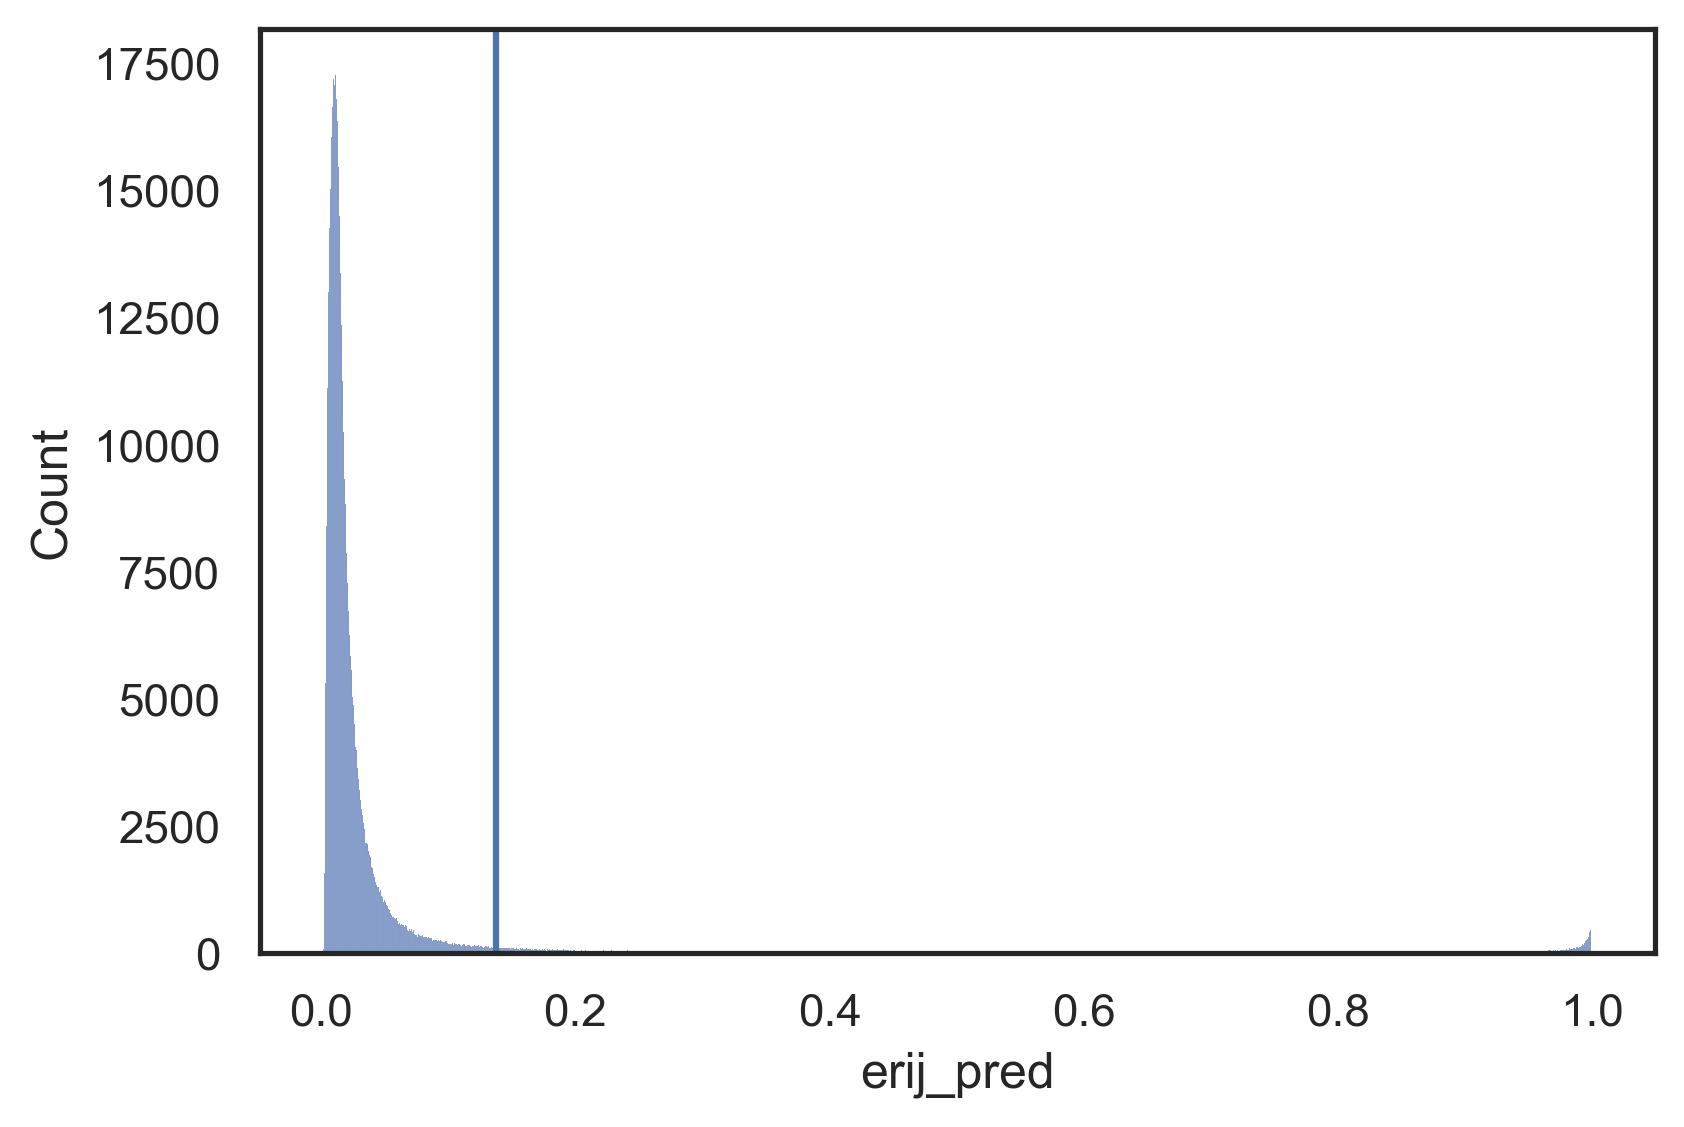

In [ ]:
# sns.histplot(erij_pred_output["erij_pred"])
# plt.axvline(0.1376)

In [ ]:
# active_erij_preds = erij_pred_output[erij_pred_output["erij_pred"] > 0.0041]
# active_erij_preds

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,erij_pred,uniprotID
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVL,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,30,0,1,0,1,4,0,1,1,3,4,-5,0.027907,A0A087WUV0
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLL,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,31,0,1,0,0,5,0,1,1,3,4,-5,0.023841,A0A087WUV0
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLT,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,32,0,1,0,0,5,0,1,1,3,3,-4,0.024626,A0A087WUV0
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTP,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,33,0,1,0,0,5,0,1,1,3,3,-4,0.028051,A0A087WUV0
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPG,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,34,0,1,0,0,5,0,1,1,3,2,-3,0.025698,A0A087WUV0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903093,ARKIMRFLRRCRHSPLVDHRLYKRSERIEK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1639,1669,0,1,1,1,3,0,3,8,1,2,8,0.018220,Q9Y6Y1
903094,RKIMRFLRRCRHSPLVDHRLYKRSERIEKG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1640,1670,0,1,1,1,3,0,3,8,1,2,8,0.014282,Q9Y6Y1
903095,KIMRFLRRCRHSPLVDHRLYKRSERIEKGQ,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1641,1671,0,1,1,1,3,1,3,7,1,2,7,0.015638,Q9Y6Y1
903096,IMRFLRRCRHSPLVDHRLYKRSERIEKGQG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1642,1672,0,1,1,1,3,1,2,7,1,2,6,0.023222,Q9Y6Y1


In [ ]:
# active_erij_tile_coords = active_erij_preds[["uniprotID", "StartPosition", "EndPosition"]]
# active_erij_tile_coords = active_erij_tile_coords.rename(columns = {"StartPosition" : "Start", "EndPosition" : "End"})
# active_erij_tile_coords

,uniprotID,Start,End
0,A0A087WUV0,0,30
1,A0A087WUV0,1,31
2,A0A087WUV0,2,32
3,A0A087WUV0,3,33
4,A0A087WUV0,4,34
...,...,...,...
903093,Q9Y6Y1,1639,1669
903094,Q9Y6Y1,1640,1670
903095,Q9Y6Y1,1641,1671
903096,Q9Y6Y1,1642,1672


In [ ]:
# # From preparing TADA preds

# def return_merged_row(uniprotID, df):
#     # Only look at rows with the same uniprot ID
#     same_uniprotID_rows = df[df["uniprotID"] == uniprotID]
#     same_uniprotID_rows = same_uniprotID_rows.sort_values(by = "Start")
    
#     # Final dataframe columns
#     new_starts = []
#     new_ends = []
#     orig_uniprotIDs = []
    
#     # Current row's values
#     curr_start = -1
#     curr_end = -1
#     curr_orig_uniprotIDs = []
    
#     for i in same_uniprotID_rows.index:
#         # Merge current row with next row
#         if curr_end >= same_uniprotID_rows.loc[i]["Start"]:
#             curr_end = max(curr_end, same_uniprotID_rows.loc[i]["End"])
        
#         # Don't merge current row with next row
#         else: 
#             new_starts.append(curr_start)
#             new_ends.append(curr_end)

#             curr_orig_uniprotIDs = [str(c) for c in curr_orig_uniprotIDs]            
            
#             curr_start = same_uniprotID_rows.loc[i]["Start"]
#             curr_end = same_uniprotID_rows.loc[i]["End"]
    
#     # Append the last values
#     new_starts.append(curr_start)
#     new_ends.append(curr_end)
    
    

#     # curr_matching_isoforms = [c for c in curr_matching_isoforms]
#     curr_orig_uniprotIDs = [str(c) for c in curr_orig_uniprotIDs]
#     orig_uniprotIDs.append(" / ".join(curr_orig_uniprotIDs))
    
#     # Remove the first (because it is just -1 or "")
#     new_starts = new_starts[1:]
#     new_ends = new_ends[1:]
#     orig_uniprotIDs = orig_uniprotIDs[1:]
    
#     return pd.DataFrame({"uniprotID" :uniprotID,
#                          "Start": new_starts,
#                         "End": new_ends
#                         })

In [ ]:
# active_erij_tile_coords.reset_index(inplace= True,drop=True)

# dfs = []
# i = 0
# for uniprotID in active_erij_tile_coords["uniprotID"].unique():
#     dfs.append(return_merged_row(uniprotID, active_erij_tile_coords))

# merged_active_erij_tile_coords = pd.concat(dfs)
# merged_active_erij_tile_coords = merged_active_erij_tile_coords.reset_index(drop = True)
# merged_active_erij_tile_coords

,uniprotID,Start,End
0,A0A087WUV0,0,522
1,A0AVK6,0,867
2,A0PJY2,0,475
3,A1A519,0,330
4,A1YPR0,0,619
...,...,...,...
1608,Q9Y6Q9,0,1424
1609,Q9Y6R6,0,833
1610,Q9Y6X0,0,1596
1611,Q9Y6X8,0,837


In [ ]:
# merged_active_erij_tile_coords.to_csv("../output/parrot_erijman_human_TF_pred_intervals.csv")

# 2. Merging PARROT PADDLE coords

In [42]:
paddle_pred_output = pd.read_csv("../data/tf_53_AA_parrot_paddle_pred.csv", index_col=0)
paddle_pred_output["padd_pred"]= paddle_pred_output["padd_pred"].str.replace("[", "")
paddle_pred_output["padd_pred"]= paddle_pred_output["padd_pred"].str.replace("]", "")
paddle_pred_output["padd_pred"] = paddle_pred_output["padd_pred"].str.split(r'\s+')
paddle_pred_output["padd_pred"] = paddle_pred_output["padd_pred"].apply(lambda x: float(x[0]))
paddle_pred_output["uniprotID"] = paddle_pred_output["GeneName"].str.split("|").str[1]
paddle_pred_output.head()
# Best threshold: 0.3312
# Using PADDLE threshold of 4

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,padd_pred,uniprotID
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,53,1,1,0,3,8,3,1,3,4,6,-6,0.958388,A0A087WUV0
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEAL...,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,54,1,1,0,2,8,3,1,3,4,6,-6,1.116155,A0A087WUV0
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEALT...,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,55,1,1,0,2,8,3,1,3,4,5,-5,1.312642,A0A087WUV0
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEALTQ...,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,56,1,1,0,2,8,3,1,3,4,5,-5,1.055705,A0A087WUV0
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEALTQW...,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,57,1,1,0,2,8,4,1,3,4,4,-4,1.152435,A0A087WUV0


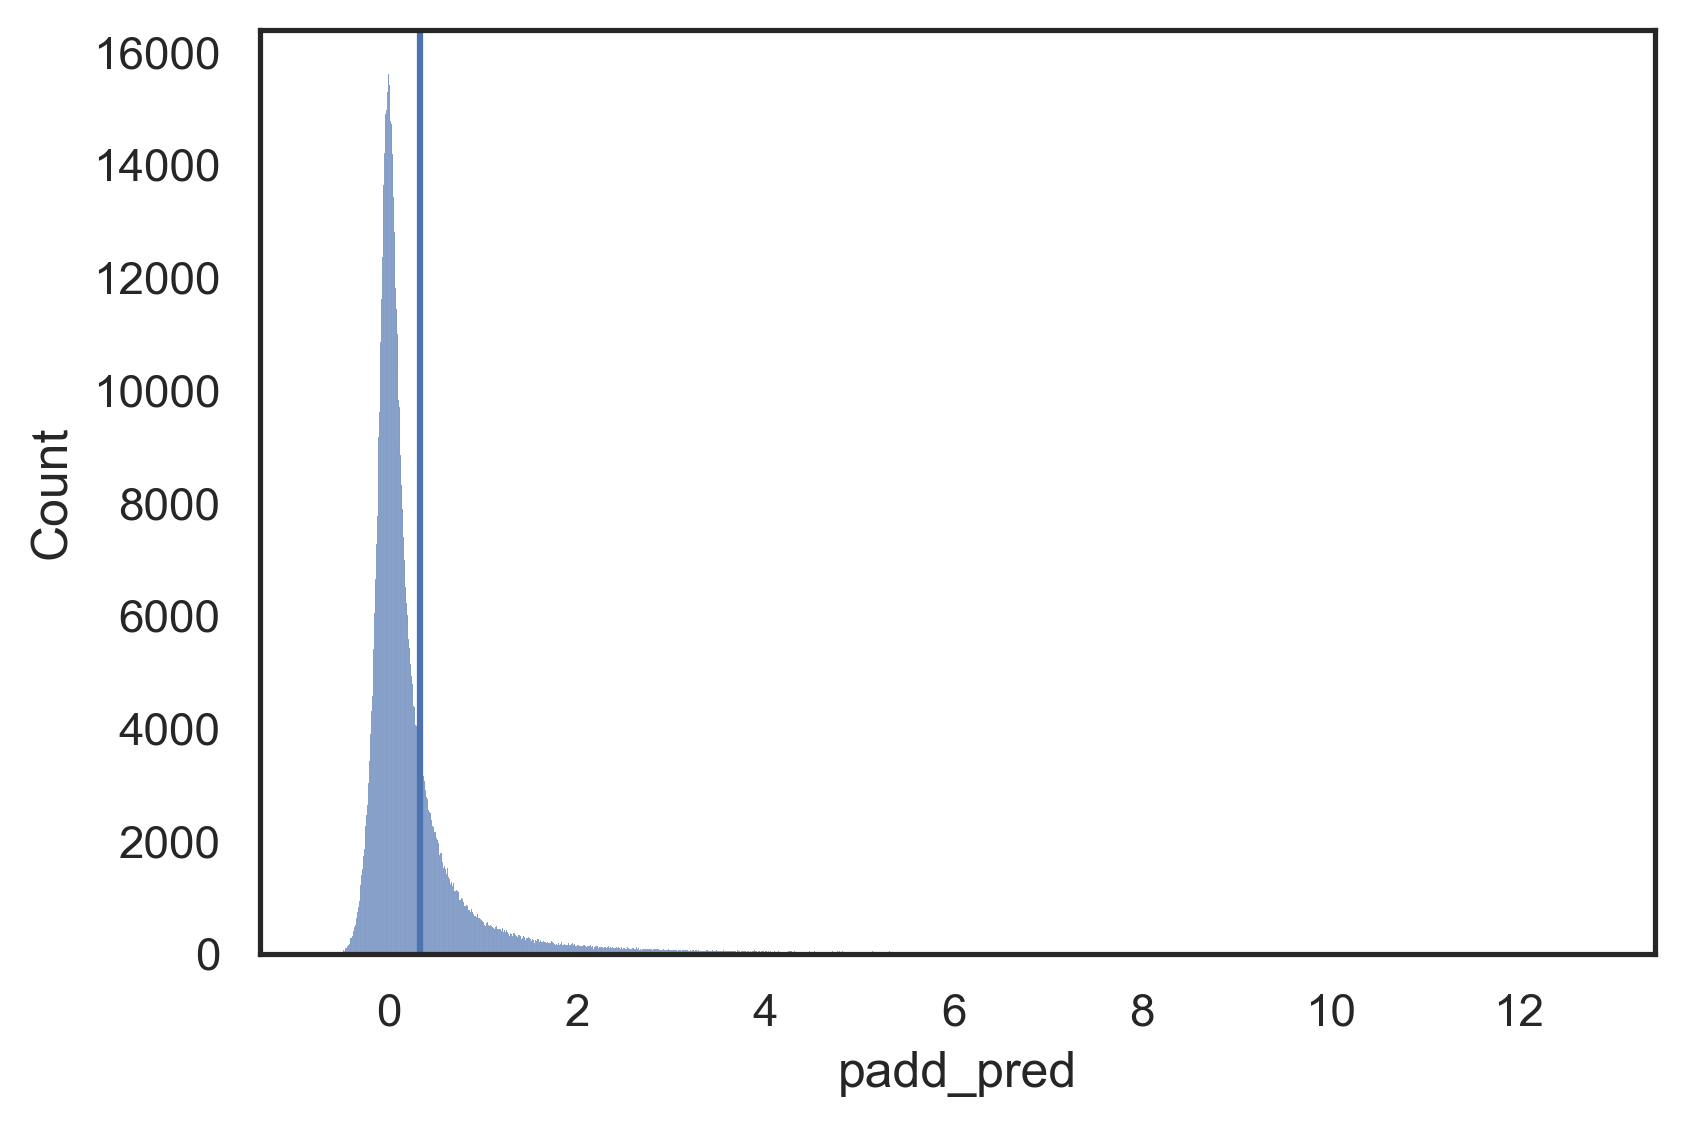

In [43]:
sns.histplot(paddle_pred_output["padd_pred"])
plt.axvline(0.3312)

In [44]:
active_paddle_preds = paddle_pred_output[paddle_pred_output["padd_pred"] > 4]
active_paddle_preds

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,padd_pred,uniprotID
681,KEYEQEFDFIKSYSIEDHIIKSNTGPNGHPDMCFVELPGVEFRAAS...,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,211,264,0,4,2,1,1,1,5,2,4,6,-3,5.970481,A0AVK6
682,EYEQEFDFIKSYSIEDHIIKSNTGPNGHPDMCFVELPGVEFRAASV...,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,212,265,0,4,2,1,1,1,4,2,4,6,-4,8.508846,A0AVK6
683,YEQEFDFIKSYSIEDHIIKSNTGPNGHPDMCFVELPGVEFRAASVN...,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,213,266,0,4,2,1,2,1,4,2,4,5,-3,6.787727,A0AVK6
684,EQEFDFIKSYSIEDHIIKSNTGPNGHPDMCFVELPGVEFRAASVNS...,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,214,267,0,4,1,1,2,1,4,3,4,5,-2,4.992770,A0AVK6
2209,DFSIESLLRENLYPKANIPDRRPSLSPFAPDFFPHLWPGDFGAFAQ...,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,223,276,1,6,1,1,6,2,1,3,5,3,-4,6.438320,A1YPR0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865851,PVGSPVSEIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDH...,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1473,1526,1,3,1,0,5,2,2,1,2,9,-8,5.518764,Q9Y6Y1
865852,VGSPVSEIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHE...,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1474,1527,1,3,1,0,5,2,2,1,2,9,-8,5.197185,Q9Y6Y1
865853,GSPVSEIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHEQ...,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1475,1528,1,3,1,0,5,2,2,1,2,9,-8,4.589119,Q9Y6Y1
865854,SPVSEIAFEKPNLPSAADWSEFLSASTSEKVENEFAQLTLSDHEQR...,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1476,1529,1,3,1,0,5,2,2,2,2,9,-7,4.560642,Q9Y6Y1


In [45]:
active_paddle_tile_coords = active_paddle_preds[["uniprotID", "StartPosition", "EndPosition"]]
active_paddle_tile_coords = active_paddle_tile_coords.rename(columns = {"StartPosition" : "Start", "EndPosition" : "End"})
active_paddle_tile_coords

,uniprotID,Start,End
681,A0AVK6,211,264
682,A0AVK6,212,265
683,A0AVK6,213,266
684,A0AVK6,214,267
2209,A1YPR0,223,276
...,...,...,...
865851,Q9Y6Y1,1473,1526
865852,Q9Y6Y1,1474,1527
865853,Q9Y6Y1,1475,1528
865854,Q9Y6Y1,1476,1529


In [46]:
active_paddle_tile_coords.reset_index(inplace= True,drop=True)

dfs = []
i = 0
for uniprotID in active_paddle_tile_coords["uniprotID"].unique():
    dfs.append(return_merged_row(uniprotID, active_paddle_tile_coords))

merged_active_paddle_tile_coords = pd.concat(dfs)
merged_active_paddle_tile_coords = merged_active_paddle_tile_coords.reset_index(drop = True)
merged_active_paddle_tile_coords

,uniprotID,Start,End
0,A0AVK6,211,267
1,A1YPR0,223,355
2,A4D1E1,1053,1119
3,A6NFI3,114,306
4,A6NI15,0,63
...,...,...,...
1036,Q9Y6Q9,783,850
1037,Q9Y6Q9,1052,1105
1038,Q9Y6Y1,716,827
1039,Q9Y6Y1,965,1018


In [47]:
merged_active_paddle_tile_coords.to_csv("../output/parrot_paddle_human_TF_pred_intervals.csv")